# Imbalance in the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(["RowNumber","CustomerId", "Surname","Geography"], axis=1, inplace=True)

In [5]:
df1 = pd.get_dummies(df, drop_first=True).copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Gender_Male      10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(1)
memory usage: 713.0 KB


In [6]:
df1.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# This function will create an artificial neural network and return confusion matrix, accuracy and loss
def ANN_performance(X_train,X_test,Y_train, Y_test , epochs, batch_size=-1):
    
    # Building the model
    model = keras.Sequential([
        keras.layers.Dense(6, input_shape=(9,), activation="relu"),
        keras.layers.Dense(3, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ])
    
    model.compile(
        optimizer="adam",
        loss=keras.losses.binary_crossentropy,
        metrics=["accuracy"]
    )
    
    if(batch_size == -1):
        model.fit(X_train,Y_train, epochs=epochs)
    else:
        model.fit(X_train,Y_train, epochs=epochs, batch_size=batch_size)
    
    accuracy = model.history.history["accuracy"]
    loss = model.history.history["loss"]
    
    # Making the prediction
    lt = model.predict(X_test)
    
    Y_pred = []
    
    for i in lt.reshape(-1,):
        Y_pred.append(np.round(i)) # rounding the predicted value and appending it in an array.
    
    confusionMatrix = confusion_matrix(Y_test, Y_pred)

    
    print(classification_report(Y_test, Y_pred))
    
    return confusionMatrix, accuracy, loss

In [8]:
target_0_count = df1.Exited.value_counts()[0]
target_1_count = df1.Exited.value_counts()[1]

target_0_count, target_1_count

(7963, 2037)

In [9]:
# undersampling 

In [10]:
df2 = pd.concat([df1[df1.Exited == 0].sample(target_1_count), df1[df1.Exited == 1]], axis=0)

In [11]:
from sklearn.model_selection import train_test_split

X_train_us, X_test_us, Y_train_us, Y_test_us = train_test_split(df2.drop(["Exited"], axis=1), df2.Exited, test_size=0.2, stratify=df2.Exited, random_state=42)

In [12]:
X_train_us.shape

(3259, 9)

In [13]:
Y_train_us.shape

(3259,)

In [14]:
Y_train_us.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [15]:
confusionMatrix_us, accur_us, loss_us = ANN_performance(X_train_us, X_test_us, Y_train_us, Y_test_us, epochs=100)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 11576.9023 - accuracy: 0.5670
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 3288.3660 - accuracy: 0.5373
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 1011.0158 - accuracy: 0.5244
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 456.4133 - accuracy: 0.5250
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 226.0256 - accuracy: 0.5143
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 115.9909 - accuracy: 0.5084
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 67.8088 - accuracy: 0.5057
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 39.8178 - accuracy: 0.5041
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 23.3471 - accuracy: 0.5023
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - lo

102/102 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4974
Epoch 82/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4894
Epoch 83/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4839
Epoch 84/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4913
Epoch 85/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5017
Epoch 86/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4968
Epoch 87/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4940
Epoch 88/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5005
Epoch 89/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.4992
Epoch 90/100
102/102 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 

In [16]:
from sklearn.metrics import ConfusionMatrixDisplay

def displayConfusion(confusion_matrix):
    con = ConfusionMatrixDisplay(confusion_matrix)
    con.plot()

def accurGraph(accur, title):
    plt.plot(np.arange(len(accur)), accur)
    plt.xlabel("epoches")
    plt.ylabel("accuracy")
    plt.title(title)

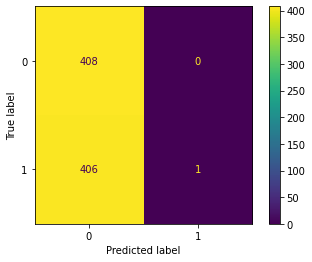

In [17]:
displayConfusion(confusionMatrix_us)

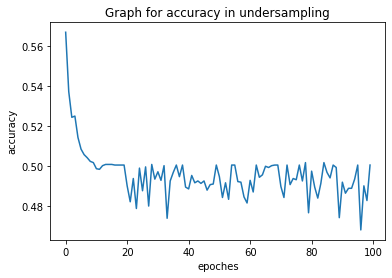

In [18]:
accurGraph(accur_us, title="Graph for accuracy in undersampling")

In [19]:
# oversampling

In [20]:
df3 = pd.concat([df1[df1.Exited == 1].sample(target_0_count, replace=True), df1[df1.Exited == 0]], axis=0)

In [21]:
df3.shape

(15926, 10)

In [22]:
X_train_os, X_test_os, Y_train_os, Y_test_os = train_test_split(df3.drop(["Exited"], axis=1), df3.Exited, test_size=0.2, stratify=df3.Exited, random_state=42)

In [23]:
X_train_os.shape

(12740, 9)

In [24]:
Y_train_os.shape

(12740,)

In [25]:
confusionMatrix_os, accur_os, loss_os = ANN_performance(X_train_os, X_test_os, Y_train_os, Y_test_os, epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 2989.3105 - accuracy: 0.4814
Epoch 2/100
399/399 [==============================] - 1s 2ms/step - loss: 162.2502 - accuracy: 0.5339
Epoch 3/100
399/399 [==============================] - 1s 2ms/step - loss: 52.9364 - accuracy: 0.5326
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 26.3191 - accuracy: 0.5280
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 24.6162 - accuracy: 0.5285
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 26.0119 - accuracy: 0.5229
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 22.4096 - accuracy: 0.5311
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 18.9752 - accuracy: 0.5276
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 22.4920 - accuracy: 0.5305
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 20.

399/399 [==============================] - 1s 2ms/step - loss: 14.5960 - accuracy: 0.5727
Epoch 81/100
399/399 [==============================] - 1s 2ms/step - loss: 11.4322 - accuracy: 0.5772
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 12.5192 - accuracy: 0.5729
Epoch 83/100
399/399 [==============================] - 1s 2ms/step - loss: 17.1822 - accuracy: 0.5650
Epoch 84/100
399/399 [==============================] - 1s 2ms/step - loss: 12.8494 - accuracy: 0.5648
Epoch 85/100
399/399 [==============================] - 1s 2ms/step - loss: 14.4111 - accuracy: 0.5608
Epoch 86/100
399/399 [==============================] - 1s 2ms/step - loss: 12.5416 - accuracy: 0.5722
Epoch 87/100
399/399 [==============================] - 1s 2ms/step - loss: 16.1596 - accuracy: 0.5618
Epoch 88/100
399/399 [==============================] - 1s 2ms/step - loss: 14.6996 - accuracy: 0.5697
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 15.9389 - 

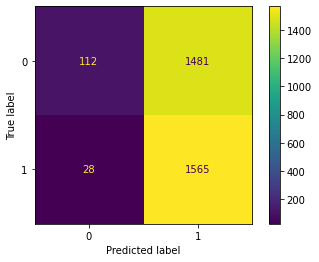

In [26]:
displayConfusion(confusionMatrix_os)

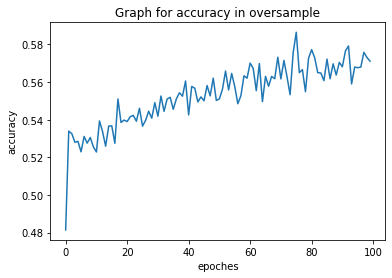

In [27]:
accurGraph(accur_os, title="Graph for accuracy in oversample")

In [28]:
from imblearn.over_sampling import SMOTE

In [31]:
smote = SMOTE(sampling_strategy="minority")
X_smote, Y_smote = smote.fit_resample(df1.drop(["Exited"], axis=1), df1.Exited)

In [32]:
X_smote.shape

(15926, 9)

In [33]:
Y_smote.shape

(15926,)

In [34]:
Y_smote.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [35]:
X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_smote, Y_smote, test_size=0.2, stratify=Y_smote, random_state=42)

In [36]:
X_train_smote.shape

(12740, 9)

In [37]:
Y_train_smote.shape

(12740,)

In [38]:
confusionMatrix_smote, accur_smote, loss_smote = ANN_performance(X_train_smote, X_test_smote, Y_train_smote, Y_test_smote, epochs=100)

Epoch 1/100
399/399 [==============================] - 1s 2ms/step - loss: 1729.6959 - accuracy: 0.5329
Epoch 2/100
399/399 [==============================] - 1s 3ms/step - loss: 143.9780 - accuracy: 0.4979
Epoch 3/100
399/399 [==============================] - 1s 3ms/step - loss: 41.6537 - accuracy: 0.4946
Epoch 4/100
399/399 [==============================] - 1s 2ms/step - loss: 17.9479 - accuracy: 0.4886
Epoch 5/100
399/399 [==============================] - 1s 2ms/step - loss: 11.5075 - accuracy: 0.4856
Epoch 6/100
399/399 [==============================] - 1s 2ms/step - loss: 7.4756 - accuracy: 0.4786
Epoch 7/100
399/399 [==============================] - 1s 2ms/step - loss: 5.8840 - accuracy: 0.4917
Epoch 8/100
399/399 [==============================] - 1s 2ms/step - loss: 7.4962 - accuracy: 0.5436
Epoch 9/100
399/399 [==============================] - 1s 2ms/step - loss: 5.2396 - accuracy: 0.5437
Epoch 10/100
399/399 [==============================] - 1s 2ms/step - loss: 6.7284 

399/399 [==============================] - 1s 2ms/step - loss: 2.1485 - accuracy: 0.5688
Epoch 82/100
399/399 [==============================] - 1s 2ms/step - loss: 2.0244 - accuracy: 0.5694
Epoch 83/100
399/399 [==============================] - 1s 2ms/step - loss: 2.1590 - accuracy: 0.5705
Epoch 84/100
399/399 [==============================] - 1s 2ms/step - loss: 2.0552 - accuracy: 0.5686
Epoch 85/100
399/399 [==============================] - 1s 2ms/step - loss: 2.2059 - accuracy: 0.5681
Epoch 86/100
399/399 [==============================] - 1s 2ms/step - loss: 2.1088 - accuracy: 0.5666
Epoch 87/100
399/399 [==============================] - 1s 2ms/step - loss: 1.8889 - accuracy: 0.5689
Epoch 88/100
399/399 [==============================] - 1s 2ms/step - loss: 2.3258 - accuracy: 0.5684
Epoch 89/100
399/399 [==============================] - 1s 2ms/step - loss: 2.0360 - accuracy: 0.5644
Epoch 90/100
399/399 [==============================] - 1s 2ms/step - loss: 2.0240 - accuracy: 

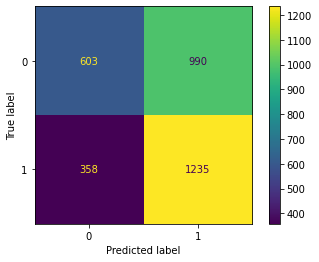

In [39]:
displayConfusion(confusionMatrix_smote)

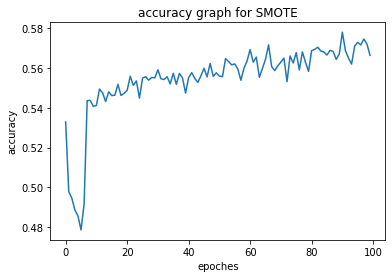

In [40]:
accurGraph(accur_smote, title="accuracy graph for SMOTE")